
# **Notebook for EMG data visualization collected from Galea** 


In [ ]:
#Mounts your google drive into this virtual machine

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Now we need to access the files downloaded, copy the path where you saved the files downloaded from the github repo and replace the path below
%cd /content/drive/MyDrive/path/to/files/cloned/from/repo/and/now/in/your/GoogleDrive/



In [ ]:
!pip install neurokit2
!pip install mne
!pip install -U pandas-profiling


In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib
import neurokit2 as nk
import mne
import matplotlib.pyplot as plt
import os

import random
#from pylsl import StreamInfo,  StreamOutlet, resolve_stream, StreamInlet

from sklearn.cross_decomposition import CCA
from scipy import signal

from scipy.signal import butter, lfilter
from scipy.fft import fft, fftfreq, ifft

import pickle
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 15]

## **Offline EMG data visualization and processing**

In [ ]:
#Replace the path below, so we can load the data
data = pd.read_csv('/content/drive/MyDrive/YOURPATH/SharedPublicly/Data/EMG_RAW-2021-08-07_10-02-37.txt',header=4 ,sep=',')
data.columns = ["Sample Index",	"EMG Channel 0",	"EMG Channel 1",	"EMG Channel 2",	"EMG Channel 3",	"EOG Channel 0",	"EOG Channel 1",	"EEG Channel 0",	"EEG Channel 1",	"EEG Channel 2",	"EEG Channel 3",	"EEG Channel 4",	"EEG Channel 5",	"EEG Channel 6",	"EEG Channel 7",	"EEG Channel 8",	"EEG Channel 9",	"PPG Channel 0",	"PPG Channel 1",	"EDA_Channel_0",	"Other",	"Raw PC Timestamp",	"Raw Device Timestamp",	"Other.1",	"Timestamp",	"Marker",	"Timestamp (Formatted)"]
data

,Sample Index,EMG Channel 0,EMG Channel 1,EMG Channel 2,EMG Channel 3,EOG Channel 0,EOG Channel 1,EEG Channel 0,EEG Channel 1,EEG Channel 2,EEG Channel 3,EEG Channel 4,EEG Channel 5,EEG Channel 6,EEG Channel 7,EEG Channel 8,EEG Channel 9,PPG Channel 0,PPG Channel 1,EDA_Channel_0,Other,Raw PC Timestamp,Raw Device Timestamp,Other.1,Timestamp,Marker,Timestamp (Formatted)
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-385.433481,-225.305584,-316.768922,-207.603003,-242.471724,-248.640805,-268.757375,-329.911748,83120.0,117379.0,0.513597,0.01,1.628345e+09,2221.557,85.0,1.628345e+09,0.0,2021-08-07 10:02:26.988
1,1.0,29132.146136,16776.817057,-30251.163870,-9612.635924,-145.509856,-145.778077,-44.658785,-38.400297,-384.092377,-223.964479,-315.696039,-206.798340,-243.008166,-247.836143,-269.830259,-328.838864,83120.0,117379.0,0.513663,0.01,1.628345e+09,2231.921,85.0,1.628345e+09,0.0,2021-08-07 10:02:37.352
2,2.0,29010.373832,16783.656691,-30287.373696,-9630.472616,-145.107525,-146.180409,-44.569378,-38.400297,-384.092377,-225.305584,-315.696039,-206.798340,-242.203503,-247.836143,-269.293817,-329.911748,83120.0,117379.0,0.513706,0.01,1.628345e+09,2231.938,85.0,1.628345e+09,0.0,2021-08-07 10:02:37.369
3,3.0,28918.374052,16783.388470,-30333.775918,-9639.726238,-144.571083,-146.448630,-44.658785,-38.266187,-384.628819,-225.037363,-315.696039,-207.066561,-242.739945,-248.640805,-268.489154,-329.911748,83120.0,117379.0,0.513749,0.01,1.628345e+09,2231.942,85.0,1.628345e+09,0.0,2021-08-07 10:02:37.373
4,4.0,29017.884018,16769.306871,-30307.624377,-9616.525127,-145.107525,-146.046298,-44.524675,-38.355593,-384.628819,-225.037363,-317.037143,-208.139444,-243.008166,-249.177247,-268.220933,-328.302423,83120.0,117379.0,0.513811,0.01,1.628345e+09,2231.946,85.0,1.628345e+09,0.0,2021-08-07 10:02:37.377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13960,136.0,28991.866588,20334.633629,-30695.605957,-9008.870603,-144.705194,-145.778077,-44.792896,-38.310890,-385.165260,-224.232700,-316.768922,-207.603003,-243.544608,-249.445468,-268.757375,-329.107085,83090.0,117276.0,0.534679,0.01,1.628345e+09,2287.760,85.0,1.628345e+09,0.0,2021-08-07 10:03:33.135
13961,137.0,28976.712105,20318.272152,-30712.503876,-9002.701521,-145.375746,-145.778077,-44.569378,-38.534407,-384.628819,-223.964479,-316.768922,-207.066561,-243.008166,-249.713689,-268.489154,-329.107085,83090.0,117276.0,0.534683,0.01,1.628345e+09,2287.764,85.0,1.628345e+09,0.0,2021-08-07 10:03:33.139
13962,138.0,29078.367839,20307.006873,-30665.565212,-8985.535382,-145.375746,-145.643967,-44.569378,-38.489704,-385.165260,-223.964479,-317.573585,-207.334782,-242.739945,-249.177247,-269.293817,-328.838864,83090.0,117276.0,0.534687,0.01,1.628345e+09,2287.768,85.0,1.628345e+09,0.0,2021-08-07 10:03:33.143
13963,139.0,29104.117048,20313.846506,-30640.486555,-8986.340044,-145.107525,-146.314519,-44.614082,-38.221483,-384.628819,-225.573805,-317.573585,-207.334782,-243.008166,-248.372584,-269.025596,-329.107085,83106.0,117301.0,0.534691,0.01,1.628345e+09,2287.772,85.0,1.628345e+09,0.0,2021-08-07 10:03:33.147


In [ ]:
#Let's grab a section of data for clarity
dt1 =data[1800:]
dt1

,Sample Index,EMG Channel 0,EMG Channel 1,EMG Channel 2,EMG Channel 3,EOG Channel 0,EOG Channel 1,EEG Channel 0,EEG Channel 1,EEG Channel 2,EEG Channel 3,EEG Channel 4,EEG Channel 5,EEG Channel 6,EEG Channel 7,EEG Channel 8,EEG Channel 9,PPG Channel 0,PPG Channel 1,EDA_Channel_0,Other,Raw PC Timestamp,Raw Device Timestamp,Other.1,Timestamp,Marker,Timestamp (Formatted)
1800,8.0,26768.315049,20989.629148,-30644.107538,-9574.950883,-144.839304,-145.375746,-44.390564,-38.310890,-385.701702,-224.232700,-317.573585,-207.603003,-243.812829,-249.177247,-268.757375,-328.838864,83371.0,118113.0,0.518482,0.01,1.628345e+09,2239.128,85.0,1.628345e+09,0.0,2021-08-07 10:02:44.552
1801,9.0,26758.524985,20962.672944,-30663.821776,-9569.452354,-144.839304,-145.375746,-44.792896,-38.489704,-385.165260,-224.232700,-316.768922,-207.066561,-244.349270,-249.177247,-269.293817,-329.107085,83371.0,118113.0,0.518470,0.01,1.628345e+09,2239.132,85.0,1.628345e+09,0.0,2021-08-07 10:02:44.556
1802,10.0,26904.034842,20931.827537,-30610.714032,-9549.201673,-145.107525,-145.778077,-44.703489,-37.953262,-384.897040,-224.232700,-316.768922,-207.603003,-243.544608,-249.177247,-268.489154,-329.107085,83371.0,118113.0,0.518437,0.01,1.628345e+09,2239.136,85.0,1.628345e+09,0.0,2021-08-07 10:02:44.560
1803,11.0,26941.451662,20910.101641,-30577.991078,-9546.921795,-145.107525,-145.778077,-44.748192,-38.087373,-385.165260,-224.232700,-317.037143,-207.066561,-243.008166,-248.372584,-268.489154,-329.107085,83345.0,118104.0,0.518425,0.01,1.628345e+09,2239.140,85.0,1.628345e+09,0.0,2021-08-07 10:02:44.564
1804,12.0,26800.099230,20897.897589,-30625.063851,-9567.708918,-145.107525,-145.643967,-44.792896,-38.489704,-384.897040,-224.769142,-316.768922,-208.407665,-243.276387,-248.372584,-269.293817,-329.107085,83345.0,118104.0,0.518415,0.01,1.628345e+09,2239.144,85.0,1.628345e+09,0.0,2021-08-07 10:02:44.568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13960,136.0,28991.866588,20334.633629,-30695.605957,-9008.870603,-144.705194,-145.778077,-44.792896,-38.310890,-385.165260,-224.232700,-316.768922,-207.603003,-243.544608,-249.445468,-268.757375,-329.107085,83090.0,117276.0,0.534679,0.01,1.628345e+09,2287.760,85.0,1.628345e+09,0.0,2021-08-07 10:03:33.135
13961,137.0,28976.712105,20318.272152,-30712.503876,-9002.701521,-145.375746,-145.778077,-44.569378,-38.534407,-384.628819,-223.964479,-316.768922,-207.066561,-243.008166,-249.713689,-268.489154,-329.107085,83090.0,117276.0,0.534683,0.01,1.628345e+09,2287.764,85.0,1.628345e+09,0.0,2021-08-07 10:03:33.139
13962,138.0,29078.367839,20307.006873,-30665.565212,-8985.535382,-145.375746,-145.643967,-44.569378,-38.489704,-385.165260,-223.964479,-317.573585,-207.334782,-242.739945,-249.177247,-269.293817,-328.838864,83090.0,117276.0,0.534687,0.01,1.628345e+09,2287.768,85.0,1.628345e+09,0.0,2021-08-07 10:03:33.143
13963,139.0,29104.117048,20313.846506,-30640.486555,-8986.340044,-145.107525,-146.314519,-44.614082,-38.221483,-384.628819,-225.573805,-317.573585,-207.334782,-243.008166,-248.372584,-269.025596,-329.107085,83106.0,117301.0,0.534691,0.01,1.628345e+09,2287.772,85.0,1.628345e+09,0.0,2021-08-07 10:03:33.147


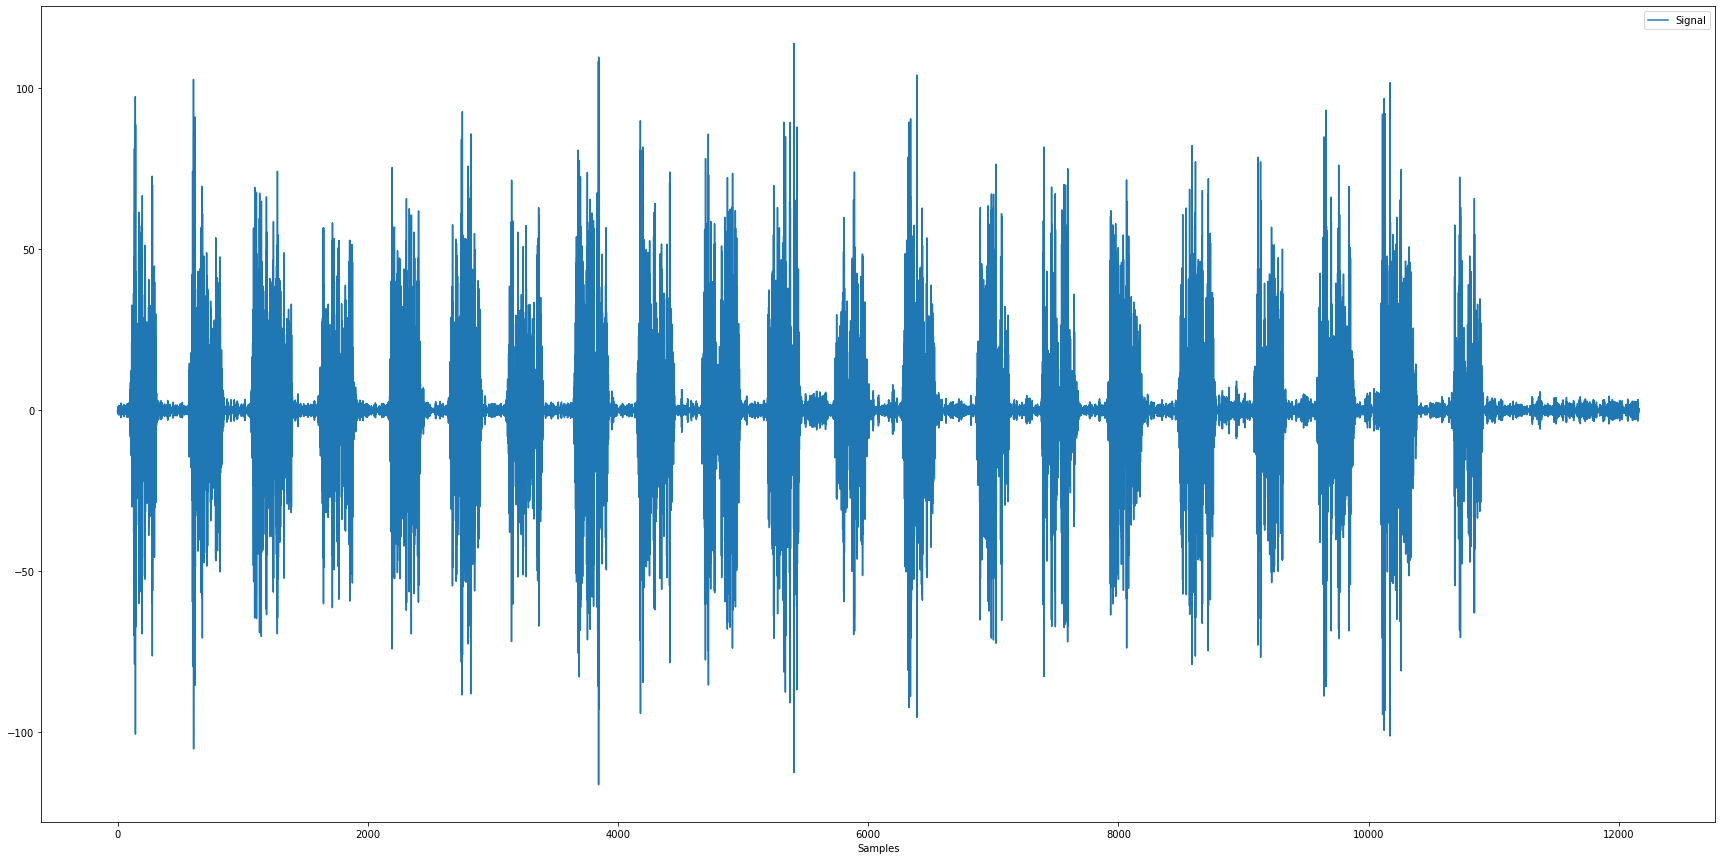

In [ ]:
dt1 =data[1800:]
emg_signal =dt1["EMG Channel 0"]
emg =nk.as_vector(emg_signal)

emg = emg - np.mean(emg)
emg = nk.signal_detrend(emg, method='polynomial', order=1, regularization=500, alpha=0.75, window=1.5, stepsize=0.02)
emg_signal, info = nk.emg_process(emg, sampling_rate=250)

nk.signal_plot(emg_signal.EMG_Clean)

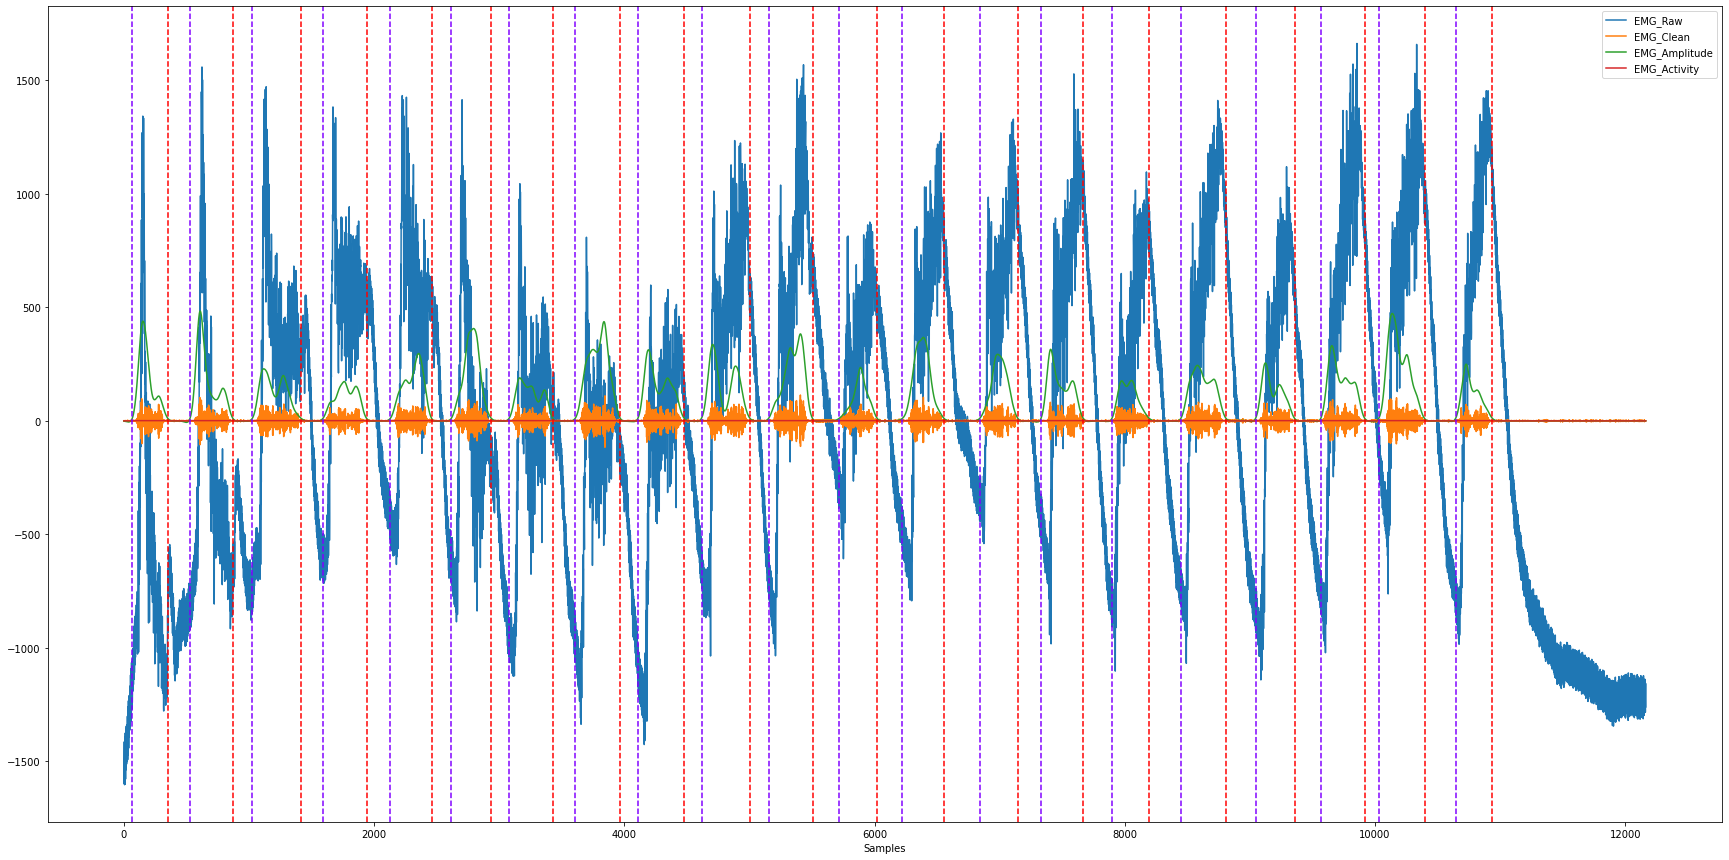

In [ ]:
nk.signal_plot(emg_signal)

In [ ]:
 #cleaned = nk.emg_clean(emg_signal, sampling_rate=250)
nk.emg_plot(emg_signal, sampling_rate=250)

In [ ]:
dt2 =data[4800:7000]
dt2 =dt2["EMG Channel 1"]
emg_1 =nk.as_vector(dt2)
emg_1


array([22659.03623808, 22631.00715053, 22619.33953993, ...,
       21602.51398117, 21547.26046887, 21604.3915277 ])

In [ ]:
emg_1 = emg_1 - np.mean(emg_1)
emg_1 = nk.stats.rescale(emg_1,to=[-150, 150])

# emg_1 = nk.signal_detrend(emg_1, method='polynomial', order=1, regularization=500, alpha=0.75, window=1.5, stepsize=0.02)
emg_signal_1, info = nk.emg_process(emg_1, sampling_rate=250)
emg_signal_1


,EMG_Raw,EMG_Clean,EMG_Amplitude,EMG_Activity,EMG_Onsets,EMG_Offsets
0,-77.606459,-0.000615,-0.000090,0.0,0,0
1,-78.529373,-0.001861,-0.000210,0.0,0,0
2,-78.913552,0.005969,-0.000333,0.0,0,0
3,-79.589178,-0.013439,-0.000459,0.0,0,0
4,-80.953678,0.024527,-0.000589,0.0,0,0
...,...,...,...,...,...,...
2195,-112.875900,-0.577520,0.010459,0.0,0,0
2196,-108.755906,0.645250,0.010456,0.0,0,0
2197,-112.394571,-0.548974,0.010452,0.0,0,0
2198,-114.213904,0.308617,0.010447,0.0,0,0


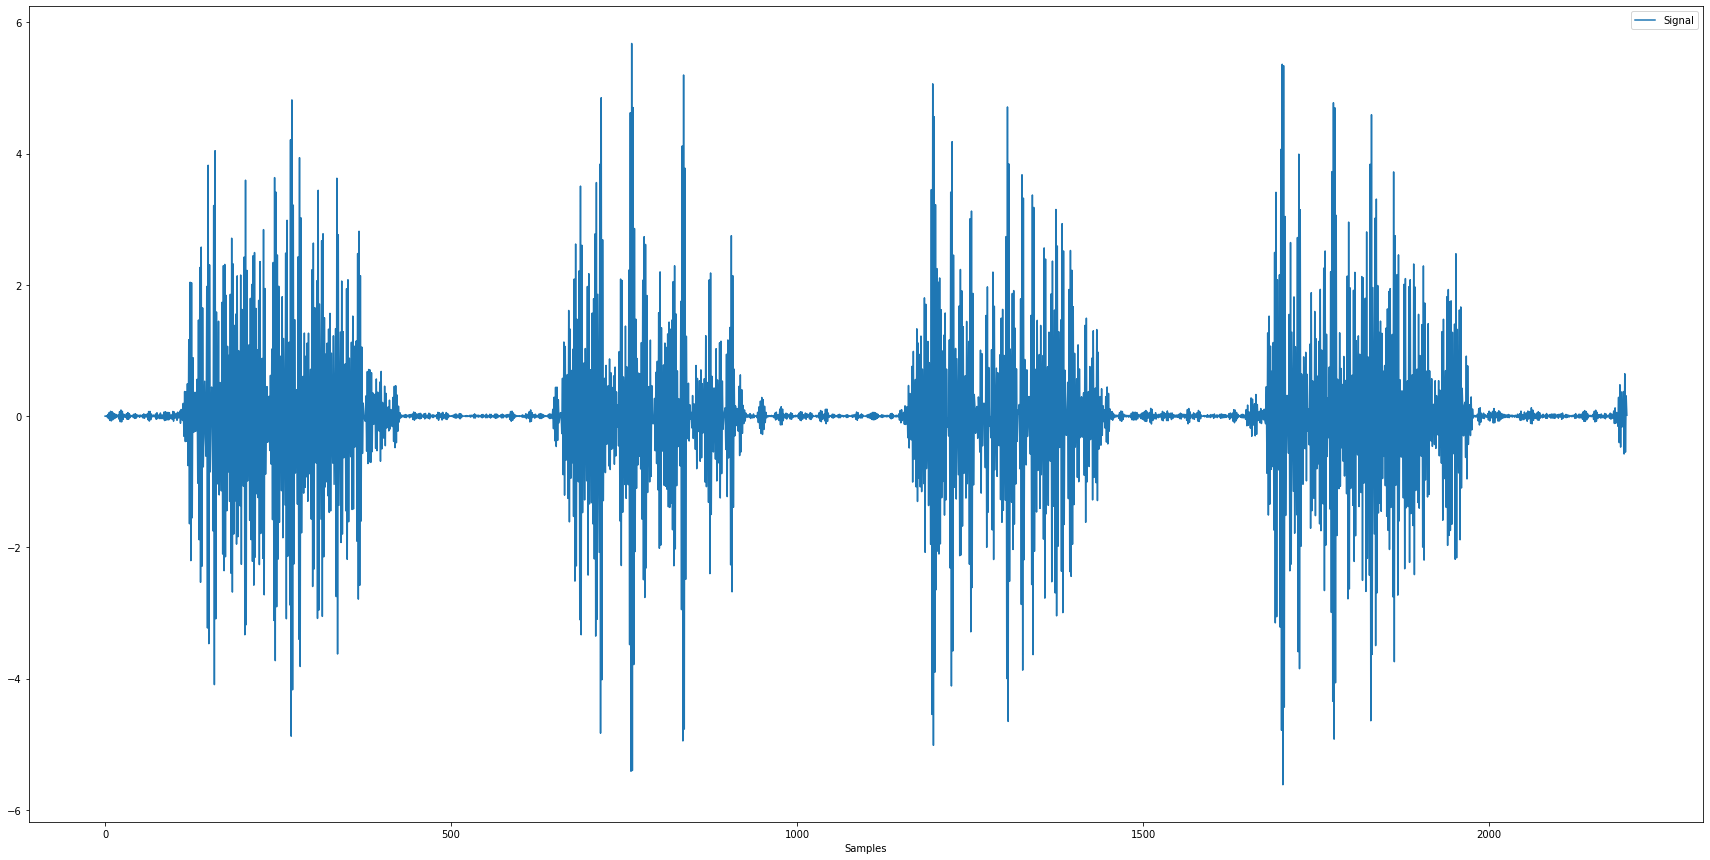

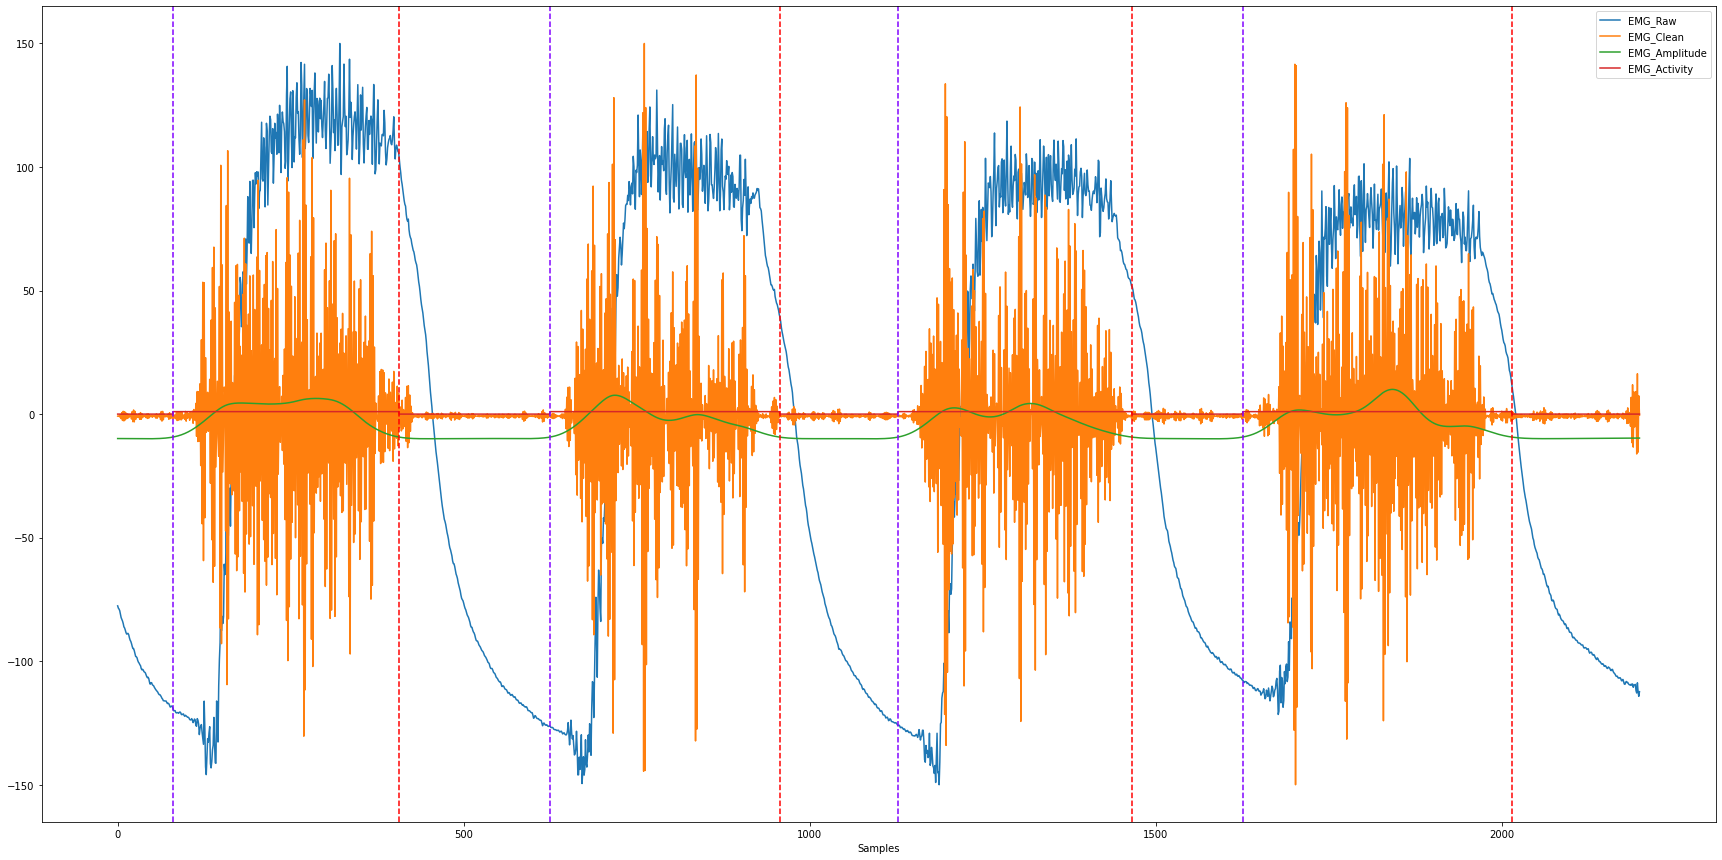

In [ ]:
nk.signal_plot(emg_signal_1.EMG_Clean)
#nk.emg_plot(signals_1, sampling_rate=250)
emg_signal_1.EMG_Clean = nk.stats.rescale(emg_signal_1.EMG_Clean,to=[-150, 150])
emg_signal_1.EMG_Amplitude = nk.stats.rescale(emg_signal_1.EMG_Amplitude,to=[-10, 10])

nk.signal_plot(emg_signal_1)


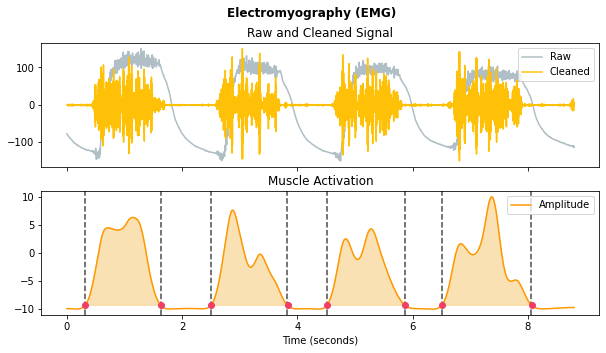

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
image_format = 'eps' # e.g .png, .svg, etc.
image_name = 'galea_emg.eps'
fig = nk.emg_plot(emg_signal_1, sampling_rate=250)
fig.savefig(image_name, format=image_format, dpi=1200)


### Signal Validation Procedure:
Signal quality was compared to [4] based on algorithm available at https://www.mathworks.com/matlabcentral/fileexchange/61830-emg_signaltonoiseratio on Matlab, and the .mat EMG data that was passed through this algorithm is available in \Data\EMG_trimmed.mat

[4] V. Agostini and M. Knaflitz. An Algorithm for the Estimation of the Signal-To-Noise Ratio in Surface Myoelectric Signals Generated During Cyclic Movements. IEEE Transactions on Biomedical Engineering, 59(1):219–225, Jan. 2012. Conference Name: IEEE Transactions on Biomedical Engineering. doi: 10.1109/TBME.2011.2170687